<h1> Student Success Prediction using Machine learning</h>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Student Success

/content/drive/MyDrive/Student Success


### Read the dataset

In [ ]:
data = pd.read_csv("dataset.csv", sep=";")

In [ ]:
data.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [ ]:
data.shape

(4424, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
data.describe(include="all")

Marital status  Application mode  Application order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571          6.886980           1.727848     9.899186   
std           0.605747          5.298964           1.313793     4.331792   
min           1.000000          1.000000           0.000000     1.000000   
25%           1.000000          1.000000           1.000000     6.000000   
50%           1.000000          8.000000           1.000000    10.000000   
75%           1.000000         12.000000           2.000000    13.000000   
max           6.000000         18.000000           9.000000    17.000000   

        Daytime/evening attendance  Previous qualification  Nacionality  \
count                  4424.000000             4424.000000  4424.000000   
unique                         NaN                     NaN          NaN   
top                            NaN                     NaN          NaN   
freq                           NaN                     NaN          NaN   
mean                      0.890823                2.531420     1.254521   
std                       0.311897                3.963707     1.748447   
min                       0.000000                1.000000     1.000000   
25%                       1.000000                1.000000     1.000000   
50%                       1.000000                1.000000     1.000000   
75%                       1.000000                1.000000     1.000000   
max                       1.000000               17.000000    21.000000   

        Mother's qualification  Father's qualification  Mother's occupation  \
count              4424.000000             4424.000000          4424.000000   
unique                     NaN                     NaN                  NaN   
top                        NaN                     NaN                  NaN   
freq                       NaN                     NaN                  NaN   
mean                 12.322107               16.455244             7.317812   
std                   9.026251               11.044800             3.997828   
min                   1.000000                1.000000             1.000000   
25%                   2.000000                3.000000             5.000000   
50%                  13.000000               14.000000             6.000000   
75%                  22.000000               27.000000            10.000000   
max                  29.000000               34.000000            32.000000   

        ...  Curricular units 2nd sem (credited)  \
count   ...                          4424.000000   
unique  ...                                  NaN   
top     ...                                  NaN   
freq    ...                                  NaN   
mean    ...                             0.541817   
std     ...                             1.918546   
min     ...                             0.000000   
25%     ...                             0.000000   
50%     ...                             0.000000   
75%     ...                             0.000000   
max     ...                            19.000000   

        Curricular units 2nd sem (enrolled)  \
count                           4424.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                               6.232143   
std                                2.195951   
min                                0.000000   
25%                                5.000000   
50%                                6.000000   
75%                                7.000000   
max                               23.000000   

        Curricular units 2nd sem (evaluations)  \
count

### check if the dataset has null values

In [ ]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

### Count the number of every class in the output

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


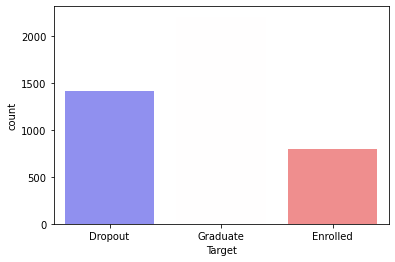

Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

In [ ]:
sns.countplot(data.Target, palette="bwr")
plt.show()
data.Target.value_counts(normalize=True)

### Draw the correlation between the attributes

<AxesSubplot:>

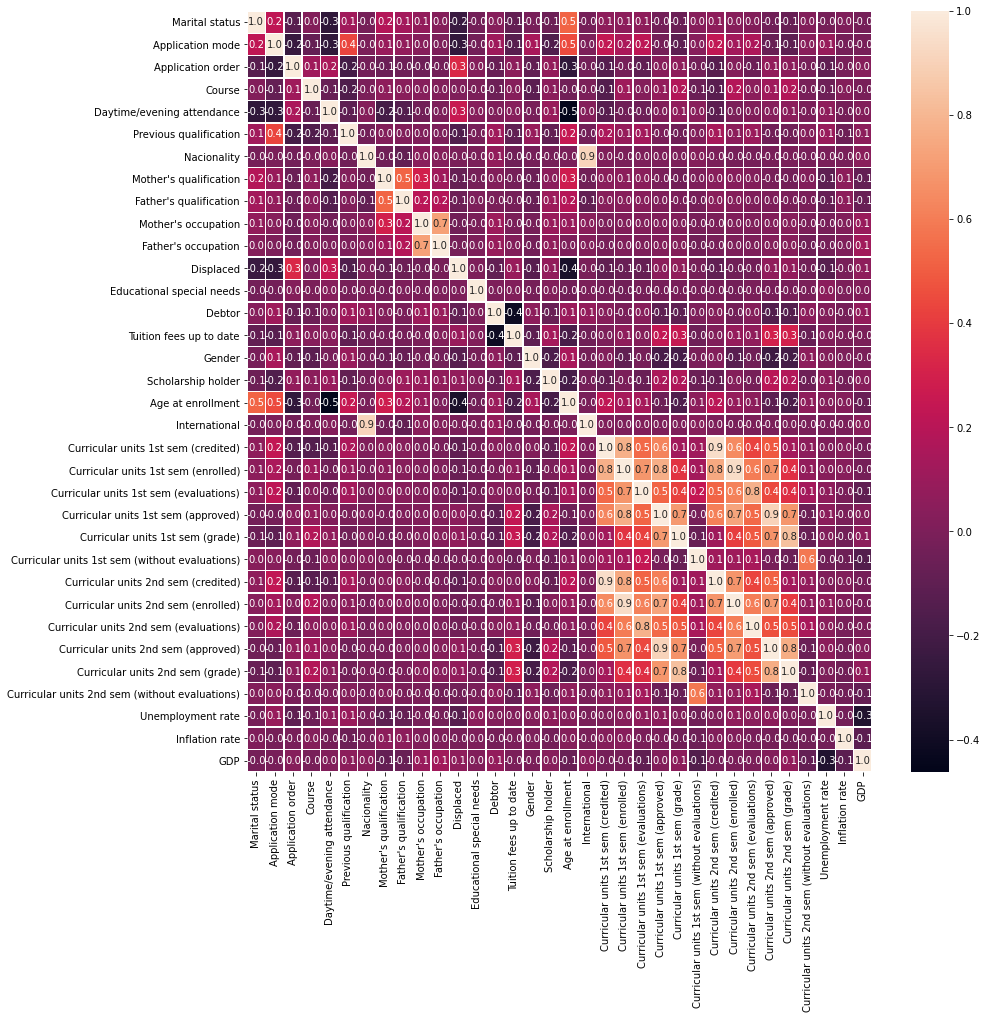

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Convert Dropout =0, Graduate=1, Enrolled=3

In [ ]:
data = pd.read_csv("dataset.csv", sep=";")
data["Target"]=data.Target.map(dict( Dropout =0, Graduate=1, Enrolled=3))

### select only Dropout and Graduate because the number of Enrolled students is very low

In [ ]:
data = data[data['Target'] != 3]

### Read the input and the output

In [ ]:
X = data.drop("Target",axis=1)
y = data["Target"]

In [ ]:
X.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  
0             1.4  1.74  
1            -0.3  0.79  
2             1.4  1.74  
3            -0.8 -3.12  
4            -0.3  0.79  

[5 rows x 34 columns]

In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

## Data scaling

In [ ]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit_transform(X)

## Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=10)

## Build models

## Logistic Regression Model

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

y_pred = logreg_cv.predict(X_test)
print(logreg_cv.best_params_, logreg_cv.best_score_)


{'C': 0.1, 'penalty': 'l2'} 0.9095623987034035


### Metrics calculation

Accuracy is:  0.9321100917431193
The precision rate is:  0.9342105263157895
The recall rate is:  0.9673024523160763
The F1-score  is:  0.9504685408299867


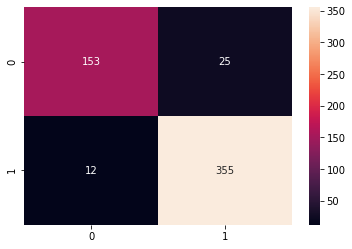

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

## SVM 

In [ ]:
model = SVC() 
params = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.5,1,0.1), 'gamma': np.arange(0.01,0.05,0.01)}
cv_svm = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print(cv_svm.best_params_, cv_svm.best_score_)

{'C': 0.5, 'gamma': 0.01, 'kernel': 'linear'} 0.9095623987034036


Accuracy is:  0.9284403669724771
The precision rate is:  0.9183673469387755
The recall rate is:  0.9809264305177112
The F1-score  is:  0.9486166007905138


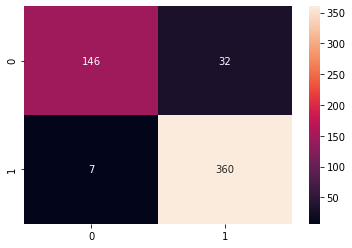

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

## K Nearest Neighbors

In [ ]:
model = KNeighborsClassifier() 
params = {'n_neighbors': np.arange(5,20,5), "weights": ['uniform', 'distance']}
cv_knn = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1,cv=5)
cv_knn.fit(X_train, y_train)
y_pred = cv_knn.predict(X_test)
print(cv_knn.best_params_, cv_knn.best_score_)

{'n_neighbors': 10, 'weights': 'uniform'} 0.8499189627228525


Accuracy is:  0.8954128440366973
The precision rate is:  0.8855721393034826
The recall rate is:  0.9700272479564033
The F1-score  is:  0.9258777633289987


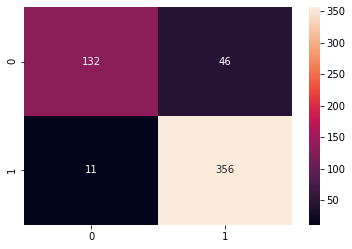

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

## Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42) 
params = {'splitter': ["best", "random"],
          'max_depth': np.arange(1,10,1),
          'min_samples_leaf': np.arange(1,5,1),
          'min_samples_split': np.arange(2,5,1)
         }
cv_dt = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1,cv=5)
cv_dt.fit(X_train, y_train)
y_pred = cv_dt.predict(X_test)
print(cv_dt.best_params_, cv_dt.best_score_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'} 0.886223662884927


Accuracy is:  0.9009174311926605
The precision rate is:  0.9023136246786633
The recall rate is:  0.9564032697547684
The F1-score  is:  0.9285714285714286


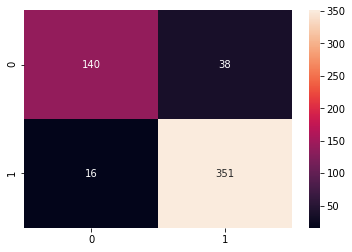

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

## Random Forest implementation

In [ ]:
model = RandomForestClassifier(random_state=42) 
params = {'n_estimators': np.arange(100,500,100)}
cv_rf = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5,verbose=3)
cv_rf.fit(X_train, y_train)
y_pred = cv_rf.predict(X_test)
print(cv_rf.best_params_, cv_rf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_estimators': 300} 0.9040518638573743


Accuracy is:  0.9247706422018349
The precision rate is:  0.9267015706806283
The recall rate is:  0.9645776566757494
The F1-score  is:  0.945260347129506


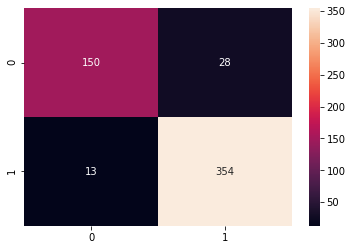

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

### Adaboost Classifier

In [ ]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

Adaboost = GridSearchCV(model, parameters,verbose=3,scoring='f1',n_jobs=-1,cv=5)
Adaboost.fit(X_train,y_train)
y_pred = Adaboost.predict(X_test)
print(Adaboost.best_params_, Adaboost.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 1000} 0.92177787415869


Accuracy is:  0.9027522935779817
The precision rate is:  0.9131578947368421
The recall rate is:  0.9455040871934605
The F1-score  is:  0.9290495314591699


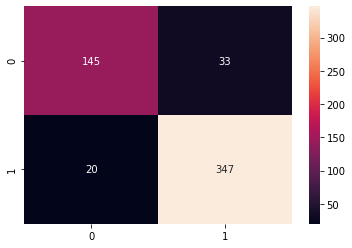

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

## XGBoost Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train,y_train)
y_pred = random_search.predict(X_test)
print(random_search.best_params_, random_search.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Ahmed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8} 0.9533220388833182


Accuracy is:  0.9321100917431193
The precision rate is:  0.9296875
The recall rate is:  0.9727520435967303
The F1-score  is:  0.9507323568575232


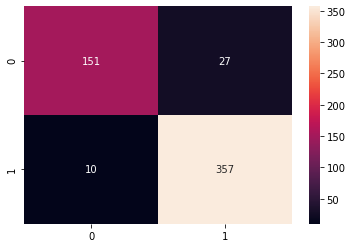

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

## MLP implementation

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=300)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels
y_pred=clf.predict(X_test)

C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy is:  0.9192660550458716
The precision rate is:  0.9306666666666666
The recall rate is:  0.9509536784741145
The F1-score  is:  0.940700808625337


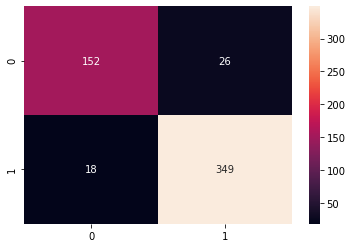

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# A sample parameter

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.075, 0.15],
    "min_samples_split": np.linspace(0.3, 0.5, 2),
    "min_samples_leaf": np.linspace(0.3, 0.5, 2),
    "max_depth":[8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[ 0.75, 0.95],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,cv=5, n_jobs=-1, verbose=3)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


Accuracy is:  0.8825688073394495
The precision rate is:  0.8894601542416453
The recall rate is:  0.9427792915531336
The F1-score  is:  0.9153439153439153


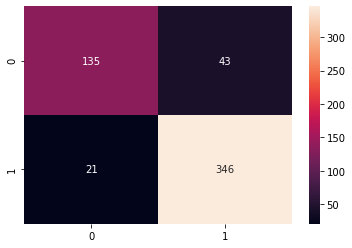

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


eclf = VotingClassifier(estimators=[ 
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ], voting='soft')

#Use the key for the classifier followed by __ and the attribute
params = {'lr__C': [1.0, 100.0],
      'svm__C': [2,3,4],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5,n_jobs=-1, verbose=3)

grid.fit(X_train,y_train)
print (grid.best_params_)

y_pred=grid.predict(X_test)




Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'lr__C': 100.0, 'svm__C': 4}


Accuracy is:  0.9247706422018349
The precision rate is:  0.9244791666666666
The recall rate is:  0.9673024523160763
The F1-score  is:  0.9454061251664448


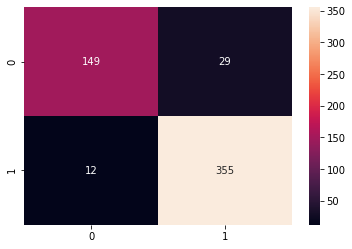

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

In [ ]:
# Implementing Linear_SGD classifier
from sklearn.linear_model import SGDClassifier 
clf = SGDClassifier(max_iter=1000)
Cs = [0.0001,0.001, 0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha': Cs}]
model = GridSearchCV(clf, tuned_parameters, scoring = 'accuracy', cv=5,n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Accuracy is:  0.9284403669724771
The precision rate is:  0.9226804123711341
The recall rate is:  0.9754768392370572
The F1-score  is:  0.9483443708609272


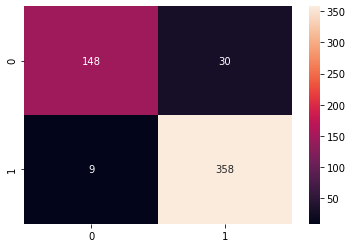

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}


bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=3)
bc_gs.fit(X_train, y_train)
y_pred=bc_gs.predict(X_test)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.872 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstr

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.856 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.870 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimato

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.861 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.867 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.856 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimato

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.848 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.883 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimator

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimator

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=1

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.890 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimato

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimator

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=1

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.2s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.878 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=1

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.841 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.841 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimator

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.861 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.867 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.865 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.874 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.875 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.859 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.833 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.854 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.887 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.864 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.874 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimato

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.818 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.861 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.794 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.844 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.869 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.874 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.872 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.859 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.870 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimator

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.875 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_esti

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.878 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.857 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.867 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_esti

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.864 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimato

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.875 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_esti

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.844 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_esti

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.874 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_esti

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.867 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.890 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimato

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.791 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.844 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.828 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.838 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.846 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.844 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.838 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.843 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.861 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.890 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.844 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.859 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.757 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.853 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.865 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.853 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.867 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=1

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.865 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.831 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.861 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.887 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.843 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.2s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.857 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.848 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.861 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.857 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.831 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.862 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.849 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.838 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.841 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.856 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimator

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.841 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.861 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.898 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.843 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.835 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.783 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.853 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;,

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.872 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.809 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.872 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.844 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.878 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.853 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.854 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.851 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.901 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.864 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.836 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.828 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.807 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.864 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.838 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.840 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.853 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.853 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.841 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimato

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.841 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.846 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.843 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.857 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimator

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.835 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.765 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.840 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.864 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.840 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.838 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.817 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.843 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.865 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.840 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimato

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.862 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.861 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.903 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.856 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimato

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.838 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.840 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.859 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.864 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.831 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.853 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.841 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.865 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.857 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.831 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.831 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.849 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.846 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.843 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.856 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.822 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.854 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.838 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.853 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.835 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.853 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.843 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.833 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.846 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.848 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.823 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.848 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.838 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.843 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.796 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.848 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.853 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.861 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.848 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.796 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.838 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.848 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.854 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.840 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.789 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.854 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.814 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.809 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.828 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.841 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.851 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.864 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.810 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.833 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.865 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.718 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.865 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.865 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.856 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.776 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.810 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.856 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.799 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.844 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.848 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.849 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.810 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.830 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.843 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.853 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.799 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.736 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.841 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.843 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.843 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.857 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.848 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_esti

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.856 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.861 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estima

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.859 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.859 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.823 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.841 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.861 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.794 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.856 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.854 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.861 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.851 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.833 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estima

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.848 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.825 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.888 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.853 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.828 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.838 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.768 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimator

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.838 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.833 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimator

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.831 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.844 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_est

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.844 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_esti

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.840 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.796 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.843 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.849 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.825 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.760 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimator

[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.851 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.796 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=3, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.903 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.3s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.909 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=1

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.878 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.888 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.912 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.810 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.904 total time=   0.4s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.4s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.906 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimator

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.2s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.3s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.4s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.862 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.806 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.2s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.901 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=1

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.911 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.3s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimator

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.2s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.2s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimator

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.864 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.869 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.904 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.875 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.908 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.825 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.909 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.903 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.901 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.874 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.906 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.903 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.864 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.911 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.872 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.875 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimato

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.851 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.4s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.903 total time=   0.2s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.4s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.908 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.872 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.875 total time=   0.5s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.4s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.903 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.870 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.906 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.903 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.906 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.867 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.833 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;,

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.898 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimator

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.862 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.903 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.908 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimator

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=1

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.904 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.911 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.854 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.854 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.914 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_est

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estim

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.851 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.865 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimator

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimator

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_est

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estim

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.838 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.831 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.908 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estima

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.2s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.828 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.853 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.903 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.835 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimator

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.908 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimator

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=1

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.912 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.865 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.848 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.859 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.844 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.906 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimator

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.849 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.841 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=1

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.870 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.906 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimato

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.908 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.862 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.867 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.853 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.862 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.904 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.851 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimato

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.862 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.859 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimato

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimator

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.872 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.909 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=1

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.823 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.861 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.836 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=1

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.856 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.836 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.853 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.838 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.846 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.836 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.835 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.833 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;,

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.921 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.911 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimato

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.846 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=1

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.836 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.820 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimat

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=1

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=1

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.817 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.856 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimator

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.827 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;,

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.908 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.849 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.846 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.853 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimato

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.861 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.838 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;,

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.822 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.867 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=1

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_esti

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_esti

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.861 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.909 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.864 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.840 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.909 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.846 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estima

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estim

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.867 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.815 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.848 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.864 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.840 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_esti

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.861 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estim

[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.846 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.906 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.865 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimato

[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=5, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.888 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.853 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.906 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.854 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.856 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimator

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.870 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.912 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.909 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.861 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.859 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimator

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.917 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.906 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.872 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.870 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estim

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.851 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.827 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimator

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.904 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.887 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.885 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.874 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.909 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.906 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.853 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.878 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.875 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.890 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.856 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimato

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.904 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.874 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.862 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.906 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.882 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.846 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.815 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimator

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.898 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.904 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimato

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.911 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.909 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estim

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.867 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.846 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.888 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.849 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimato

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.906 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.869 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.861 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.872 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.843 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.906 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimator

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.909 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.870 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.909 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.911 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.844 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.849 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.909 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.904 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.893 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.887 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.887 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimato

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.906 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.883 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.909 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.869 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimato

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.904 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.875 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.912 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_es

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.875 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.891 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.890 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_es

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.877 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_es

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.880 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.841 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.869 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estim

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.909 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_es

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_es

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_es

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.872 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=None, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.909 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_esti

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estim

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estim

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estim

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.838 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.831 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.831 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.825 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.906 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimato

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_esti

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.828 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.870 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_est

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.841 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.911 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.857 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimator

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.810 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.820 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimato

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.854 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estim

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.836 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.841 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.828 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimator

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.864 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_esti

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_esti

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.912 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimat

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.844 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_esti

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.869 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estim

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.841 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.857 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_esti

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estim

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.904 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.786 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.838 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimator

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.844 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.846 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estim

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.914 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.857 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimator

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.865 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_esti

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estim

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.796 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimator

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.912 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.825 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estim

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.865 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.906 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.878 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_esti

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.904 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.838 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.909 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimator

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.890 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.869 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=5, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_esti

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.911 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estim

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estim

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.836 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.875 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.865 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.849 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.901 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.916 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimator

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.869 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estim

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estim

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estim

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_esti

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.877 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.904 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.883 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimator

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.844 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.904 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimator

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estim

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estim

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.843 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.844 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.893 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimato

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.818 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimato

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.859 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=7, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimator

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.859 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_es

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.867 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.898 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_e

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.853 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estim

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.872 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_esti

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estim

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.848 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.844 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_es

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_e

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_es

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.877 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=2;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_esti

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.900 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.911 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.862 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_esti

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_est

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.906 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estim

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.846 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_es

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.903 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.874 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_e

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.864 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_e

[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.874 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.883 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_es

[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.869 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.859 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=2;, score=0.831 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.854 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.911 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_est

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.895 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.887 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_esti

[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.885 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.883 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estima

[CV 2/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_est

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.864 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estim

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.872 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.888 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.877 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.887 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=2;, score=0.820 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.870 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estima

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.914 total time=   0.3s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.903 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.857 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimator

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.877 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.867 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.746 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimato

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.882 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimat

[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.771 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.891 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.911 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.883 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.895 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.901 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.898 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.882 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estima

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.900 total time=   0.2s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.878 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.898 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.906 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_est

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.864 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.846 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=5;, score=0.856 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators

[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimators=20;, score=0.904 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.818 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.857 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimator

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.875 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=10;, score=0.888 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.870 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.896 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.882 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.882 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.874 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.838 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estima

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.883 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=20;, score=0.906 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=2;, score=0.827 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_esti

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.904 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.903 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=10;, score=0.882 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=5;, score=0.885 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estima

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.896 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.877 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=0.7, n_estimators=20;, score=0.901 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_est

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.878 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.877 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.862 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.872 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.893 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.878 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.5, n_estimators=20;, score=0.903 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.880 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.898 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.903 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.891 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=7, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.4s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.908 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_est

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.880 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.878 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estima

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.890 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.893 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.900 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_est

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.887 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.908 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.893 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.856 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.874 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.890 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.898 total time=   0.1s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.901 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.874 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimat

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.833 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=5;, score=0.875 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.916 total time=   0.1s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimator

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.833 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.864 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.877 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.885 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=10;, score=0.904 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.912 total time=   0.2s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimat

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.893 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.890 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.875 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=0.7, n_estimators

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.880 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=2, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=20;, score=0.895 total time=   0.4s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.5, n_estima

[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.901 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_estimators=10;, score=0.891 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=0.7, n_esti

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.898 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estimators=5;, score=0.870 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.5, n_estima

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.888 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=0.7, n_estimators=20;, score=0.895 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_estimators=2;, score=0.885 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.7, max_samples=1.0, n_esti

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.891 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.895 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_est

[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=2;, score=0.872 total time=   0.0s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.895 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.900 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estima

[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.891 total time=   0.1s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.861 total time=   0.1s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.900 total time=   0.1s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=0.7, n_estimat

[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.891 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.893 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.896 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.5, max_samples=1.0, n_estimat

[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.880 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.862 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators=5;, score=0.861 total time=   0.0s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=0.7, n_estimators

[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.887 total time=   0.2s
[CV 5/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.896 total time=   0.2s
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=2;, score=0.859 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=None, base_estimator__min_samples_leaf=3, base_estimator__min_samples_split=5, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimato

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

Accuracy is:  0.8532110091743119
The precision rate is:  0.8847184986595175
The recall rate is:  0.8991825613079019
The F1-score  is:  0.8918918918918919


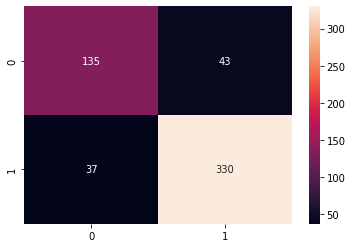

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
fscore=2*((precision_rate*recall_rate)/(precision_rate+recall_rate))
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)
print("The F1-score  is: ", fscore)

Logistic Regression with 93.2 % without feature selection 